In [128]:
### Here we will create song from the dataset which has aroundf 1600 songs
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish_songs.txt

--2020-06-02 16:26:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 2607:f8b0:400c:c15::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish_songs.txt’

/tmp/irish_songs.tx 100%[===================>]  67.35K  --.-KB/s    in 0s      

2020-06-02 16:26:42 (149 MB/s) - ‘/tmp/irish_songs.txt’ saved [68970/68970]



In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [0]:
corpus=[]
with open('Beat_it.txt','r',encoding='utf-8') as irish:
  irish_songs=irish.readlines()
  for lines in irish_songs:
    corpus.append(lines[:-1])


In [0]:
data = open('/tmp/irish_songs.txt').read()

corpus = data.lower().split("\n")

In [158]:
len(corpus),corpus[:2]

(52,
 ["They told him don't you ever come around here",
  "Don't want to see your face, you better disappear"])

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [0]:
token=Tokenizer()
token.fit_on_texts(corpus)
word_index=token.word_index
vocab_size=len(word_index)+1

In [0]:
#word_index

In [162]:
vocab_size

88

In [0]:
corpus_seq=token.texts_to_sequences(corpus)

In [164]:
corpus_seq[:2]

[[33, 43, 44, 27, 3, 45, 46, 47, 48], [27, 9, 4, 34, 7, 49, 3, 26, 50]]

In [0]:
### Lets create incremental dataset from each line of song
incremental_corpus=[]
for lines in corpus_seq:
  for i in range(2,len(lines) + 1):
    incremental_corpus.append(lines[:i])

In [166]:
incremental_corpus[:10]

[[33, 43],
 [33, 43, 44],
 [33, 43, 44, 27],
 [33, 43, 44, 27, 3],
 [33, 43, 44, 27, 3, 45],
 [33, 43, 44, 27, 3, 45, 46],
 [33, 43, 44, 27, 3, 45, 46, 47],
 [33, 43, 44, 27, 3, 45, 46, 47, 48],
 [27, 9],
 [27, 9, 4]]

In [0]:
##Max length
max_length=0
for lines in corpus_seq:
  if len(lines) > max_length:
    max_length= len(lines)

In [0]:
#max_length=8

In [0]:
#### Lets padd the sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
corpus_pad_seq=pad_sequences(incremental_corpus,maxlen=max_length,padding='pre')

In [171]:
corpus_pad_seq[:2]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 33, 43],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 33, 43, 44]], dtype=int32)

In [0]:
### Take the input and output
corpus_data=corpus_pad_seq[:,:-1]
corpus_labels=corpus_pad_seq[:,-1]

In [173]:
corpus_data[:2]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 33],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 33, 43]], dtype=int32)

In [0]:
##Convert the labels to categorical
from tensorflow.keras.utils import to_categorical
#corpus_labels=to_categorical(corpus_labels,num_classes=vocab_size)

In [0]:
## Lets create model
from tensorflow.keras.layers import Embedding,Dense,LSTM,Bidirectional,Conv1D,MaxPooling1D
from tensorflow.keras.optimizers import Adam

In [176]:
model=keras.Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=300,input_length=max_length-1))
#model.add(Conv1D(filters=64,kernel_size=5))
#model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional((LSTM(150))))
model.add(Dense(units=vocab_size,activation=tf.nn.softmax))
#Lets define the adam learning rate also.
### Lets the model learn fast fromt the data
adam=Adam(learning_rate=0.01)
model.compile(optimizer=adam,loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 11, 300)           26400     
_________________________________________________________________
bidirectional_8 (Bidirection (None, 300)               541200    
_________________________________________________________________
dense_11 (Dense)             (None, 88)                26488     
Total params: 594,088
Trainable params: 594,088
Non-trainable params: 0
_________________________________________________________________


In [177]:
corpus_data.shape,corpus_labels.shape

((347, 11), (347,))

In [179]:
model.fit(corpus_data,corpus_labels,epochs=500)

Epoch 1/500
11/11 [==============================] - 1s 54ms/step - loss: 3.6701 - accuracy: 0.8271
Epoch 2/500
11/11 [==============================] - 1s 55ms/step - loss: 3.6688 - accuracy: 0.8271
Epoch 3/500
11/11 [==============================] - 1s 55ms/step - loss: 3.6622 - accuracy: 0.8357
Epoch 4/500
11/11 [==============================] - 1s 54ms/step - loss: 3.6589 - accuracy: 0.8386
Epoch 5/500
11/11 [==============================] - 1s 55ms/step - loss: 3.6580 - accuracy: 0.8386
Epoch 6/500
11/11 [==============================] - 1s 55ms/step - loss: 3.6579 - accuracy: 0.8386
Epoch 7/500
11/11 [==============================] - 1s 55ms/step - loss: 3.6578 - accuracy: 0.8386
Epoch 8/500
11/11 [==============================] - 1s 55ms/step - loss: 3.6575 - accuracy: 0.8386
Epoch 9/500
11/11 [==============================] - 1s 57ms/step - loss: 3.6550 - accuracy: 0.8415
Epoch 10/500
11/11 [==============================] - 1s 56ms/step - loss: 3.6549 - accuracy: 0.8415

In [0]:
features=model.history.history['accuracy']

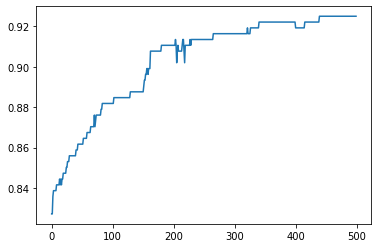

In [181]:
plt.plot(features)

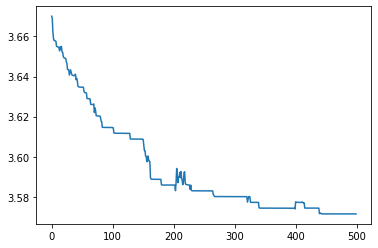

In [184]:
loss=features=model.history.history['loss']
plt.plot(loss)